# Model merging

Two or more reference models can be combined into one, without needing any of the two original training datasets. The merged model will have indirectly learned from all datasets. The models to be merged don't even need to be of the same type, we can merge a `HBR` with a `BLR` model. The resulting model will have the type and configuration of the first model in the list. 


In [15]:
from pcntoolkit import load_fcon1000, HBR, NormativeModel, BLR
from pcntoolkit.util.plotter import plot_centiles_advanced
import numpy as np

In [ ]:
# Load the FCON data
data = load_fcon1000()
# Drop all but the first three response vars
data=data.sel({"response_vars":data.response_vars[:3]})

# Select a few sites at random for transfering
all_sites = data.unique_batch_effects['site']
selected_sites = np.random.choice(all_sites, len(all_sites)//2, replace=False)
print(selected_sites)

# Split by those sites
left_data,right_data  = data.batch_effects_split({"site":selected_sites},names=( "left", "right"))

# Split into train and test setss
left_train, left_test = left_data.train_test_split((0.8, 0.2))
right_train, right_test = right_data.train_test_split((0.8, 0.2))

Process: 86410 - 2025-11-20 10:56:49 - Removed 0 NANs
Process: 86410 - 2025-11-20 10:56:49 - Dataset "fcon1000" created.
    - 1078 observations
    - 1078 unique subjects
    - 1 covariates
    - 217 response variables
    - 2 batch effects:
    	sex (2)
	site (23)
    
['Leiden_2200' 'Bangor' 'SaintLouis' 'Pittsburgh' 'Milwaukee_b'
 'Beijing_Zang' 'NewYork_a' 'Munchen' 'ICBM' 'Oulu' 'Leiden_2180']
Process: 86410 - 2025-11-20 10:56:49 - Dataset "left" created.
    - 614 observations
    - 614 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (11)
    
Process: 86410 - 2025-11-20 10:56:49 - Dataset "right" created.
    - 464 observations
    - 464 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (12)
    


In [17]:
# Fit a model
#  Use default likelihood; Normal, with bspline in mu and sigma, and a random intercept for mu
left_model = NormativeModel(HBR(), save_dir ="../out/models/left_merge_model")
left_model.fit_predict(left_train, left_test)


Process: 86410 - 2025-11-20 10:56:49 - Fitting models on 3 response variables.
Process: 86410 - 2025-11-20 10:56:49 - Fitting model for lh_G&S_frontomargin_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,58,0.17,127
,2000,46,0.17,127
,2000,32,0.18,47
,2000,28,0.18,15


Process: 86410 - 2025-11-20 10:57:00 - Fitting model for lh_G&S_occipital_inf_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,40,0.18,95
,2000,60,0.19,63
,2000,42,0.19,95
,2000,13,0.19,31


Process: 86410 - 2025-11-20 10:57:10 - Fitting model for lh_G&S_paracentral_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,66,0.16,31
,2000,44,0.16,31
,2000,237,0.15,127
,2000,92,0.16,127


Sampling: []


Process: 86410 - 2025-11-20 10:57:20 - Making predictions on 3 response variables.
Process: 86410 - 2025-11-20 10:57:20 - Computing z-scores for 3 response variables.
Process: 86410 - 2025-11-20 10:57:20 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:21 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:21 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:21 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 10:57:21 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:23 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:25 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:27 - Computing log-probabilities for 3 response variables.
Process: 86410 - 2025-11-20 10:57:27 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:27 - Computing log-probabilities for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:27 - Computing log-probabilities for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:28 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 86410 - 2025-11-20 10:57:29 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 10:57:29 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 10:57:29 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:30 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:32 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:33 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 10:57:33 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:34 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:34 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:36 - Saving model to:
	../out/models/left_merge_model.


Sampling: []


Process: 86410 - 2025-11-20 10:57:36 - Making predictions on 3 response variables.
Process: 86410 - 2025-11-20 10:57:36 - Computing z-scores for 3 response variables.
Process: 86410 - 2025-11-20 10:57:36 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:36 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:36 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:37 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 10:57:37 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:38 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:40 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:41 - Computing log-probabilities for 3 response variables.
Process: 86410 - 2025-11-20 10:57:41 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:42 - Computing log-probabilities for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:42 - Computing log-probabilities for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:42 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 86410 - 2025-11-20 10:57:43 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 10:57:43 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 10:57:43 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:45 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:46 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:48 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 10:57:48 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:48 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 10:57:49 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 10:57:50 - Saving model to:
	../out/models/left_merge_model.


<xarray.NormData> Size: 45kB
Dimensions:            (observations: 123, response_vars: 3, covariates: 1,
                        batch_effect_dims: 2, centile: 5, statistic: 11)
Coordinates:
  * observations       (observations) int64 984B 752 704 305 175 ... 125 637 912
  * response_vars      (response_vars) <U30 360B 'lh_G&S_frontomargin_thickne...
  * covariates         (covariates) <U3 12B 'age'
  * batch_effect_dims  (batch_effect_dims) <U4 32B 'sex' 'site'
  * centile            (centile) float64 40B 0.05 0.25 0.5 0.75 0.95
  * statistic          (statistic) <U8 352B 'EXPV' 'MACE' ... 'SMSE' 'ShapiroW'
Data variables:
    subject_ids        (observations) object 984B 'Munchen_sub70942' ... 'Oul...
    Y                  (observations, response_vars) float64 3kB 2.209 ... 2.145
    X                  (observations, covariates) float64 984B 70.0 ... 22.0
    batch_effects      (observations, batch_effect_dims) <U12 12kB 'M' ... 'O...
    Z                  (observations, response_vars) float64 3kB -0.1984 ... ...
    centiles           (centile, observations, response_vars) float64 15kB 1....
    logp               (observations, response_vars) float64 3kB -0.9467 ... ...
    Yhat               (observations, response_vars) float64 3kB 2.244 ... 2.228
    statistics         (response_vars, statistic) float64 264B 0.1968 ... 0.9729
    Y_harmonized       (observations, response_vars) float64 3kB 2.074 ... 2.282
Attributes:
    real_ids:                       True
    is_scaled:                      False
    name:                           left_test
    unique_batch_effects:           {np.str_('sex'): [np.str_('F'), np.str_('...
    batch_effect_counts:            defaultdict(<function NormData.register_b...
    covariate_ranges:               {np.str_('age'): {'mean': np.float64(28.7...
    batch_effect_covariate_ranges:  {np.str_('sex'): {np.str_('F'): {np.str_(...

In [18]:
right_model = NormativeModel(BLR(heteroskedastic=True, warp_name="WarpSinhArcsinh"), save_dir ="../out/models/right_merge_model")
right_model.fit_predict(right_train, right_test)

Process: 86410 - 2025-11-20 10:57:50 - Fitting models on 3 response variables.
Process: 86410 - 2025-11-20 10:57:50 - Fitting model for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 10:57:50 - Fitting model for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:50 - Fitting model for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:50 - Making predictions on 3 response variables.
Process: 86410 - 2025-11-20 10:57:50 - Computing z-scores for 3 response variables.
Process: 86410 - 2025-11-20 10:57:50 - Computing z-scores for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:50 - Computing z-scores for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:50 - Computing z-scores for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 10:57:50 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 10:57:50 - Computing centiles for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57

/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")


Process: 86410 - 2025-11-20 10:57:51 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 10:57:51 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 10:57:51 - Computing centiles for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:51 - Computing centiles for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:51 - Computing centiles for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 10:57:51 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 10:57:51 - Harmonizing data for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:51 - Harmonizing data for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:51 - Harmonizing data for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 10:57:51 - Saving model to:
	../out/models/

/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")


Process: 86410 - 2025-11-20 10:57:52 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 10:57:52 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 10:57:52 - Computing centiles for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:52 - Computing centiles for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:52 - Computing centiles for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 10:57:52 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 10:57:52 - Harmonizing data for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 10:57:52 - Harmonizing data for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 10:57:52 - Harmonizing data for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 10:57:52 - Saving model to:
	../out/models/

<xarray.NormData> Size: 38kB
Dimensions:            (observations: 93, response_vars: 3, covariates: 1,
                        batch_effect_dims: 2, centile: 5, statistic: 11)
Coordinates:
  * observations       (observations) int64 744B 844 495 869 536 ... 518 398 871
  * response_vars      (response_vars) <U30 360B 'lh_G&S_frontomargin_thickne...
  * covariates         (covariates) <U3 12B 'age'
  * batch_effect_dims  (batch_effect_dims) <U4 32B 'sex' 'site'
  * centile            (centile) float64 40B 0.05 0.25 0.5 0.75 0.95
  * statistic          (statistic) <U8 352B 'EXPV' 'MACE' ... 'SMSE' 'ShapiroW'
Data variables:
    subject_ids        (observations) object 744B 'NewYork_a_ADHD_sub14465' ....
    Y                  (observations, response_vars) float64 2kB 2.306 ... 2.315
    X                  (observations, covariates) float64 744B 47.06 ... 24.0
    batch_effects      (observations, batch_effect_dims) <U17 13kB 'M' ... 'N...
    Z                  (observations, response_vars) float64 2kB 0.04519 ... ...
    centiles           (centile, observations, response_vars) float64 11kB 1....
    logp               (observations, response_vars) float64 2kB -0.8485 ... ...
    Yhat               (observations, response_vars) float64 2kB 2.284 ... 2.298
    statistics         (response_vars, statistic) float64 264B 0.02139 ... 0....
    Y_harmonized       (observations, response_vars) float64 2kB 2.306 ... 2.315
Attributes:
    real_ids:                       True
    is_scaled:                      False
    name:                           right_test
    unique_batch_effects:           {np.str_('sex'): [np.str_('F'), np.str_('...
    batch_effect_counts:            defaultdict(<function NormData.register_b...
    covariate_ranges:               {np.str_('age'): {'mean': np.float64(27.5...
    batch_effect_covariate_ranges:  {np.str_('sex'): {np.str_('F'): {np.str_(...

Sampling: []


Process: 86410 - 2025-11-20 11:13:11 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 11:13:11 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 11:13:11 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:12 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:14 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:15 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 11:13:15 - Harmonizing data for lh_G&S_occipital_inf_thickness.


/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/math_functions/likelihood.py:201: RuntimeWarning: divide by zero encountered in divide
  return (Y - mu) / sigma
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:16 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:16 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


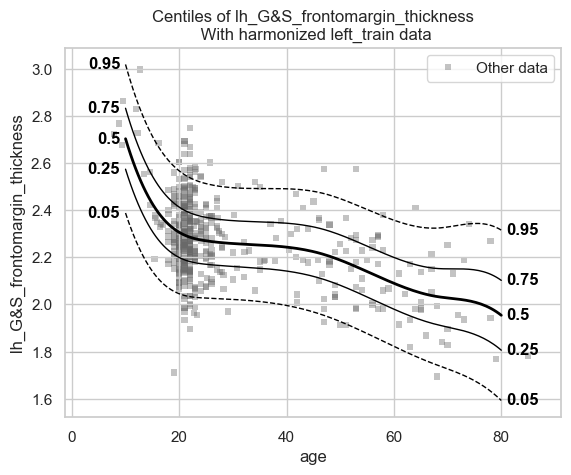

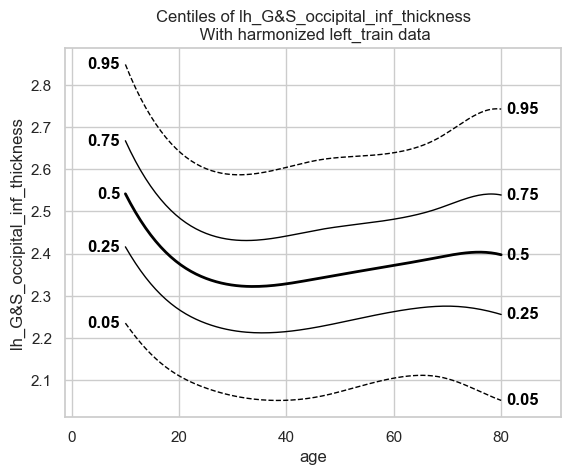

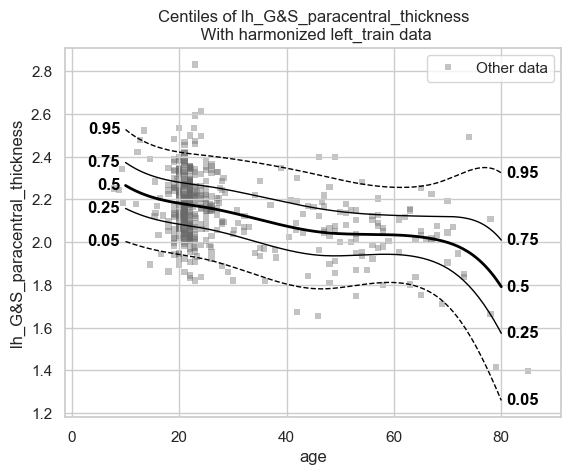

In [29]:
# Show the learned centiles
plot_centiles_advanced(left_model, scatter_data = left_train, covariate_range=(10, 80), show_other_data=True)

Process: 86410 - 2025-11-20 11:01:49 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 11:01:49 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 11:01:49 - Computing centiles for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 11:01:49 - Computing centiles for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 11:01:49 - Computing centiles for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 11:01:49 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 11:01:49 - Harmonizing data for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 11:01:49 - Harmonizing data for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 11:01:49 - Harmonizing data for lh_G&S_frontomargin_thickness.


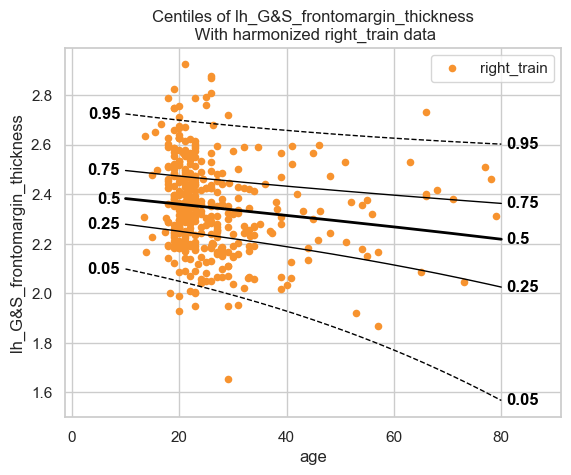

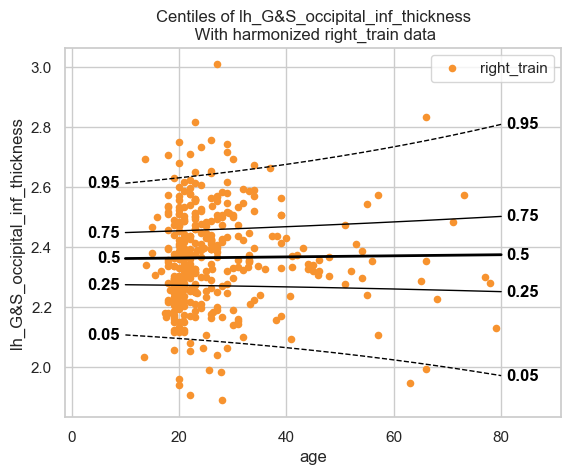

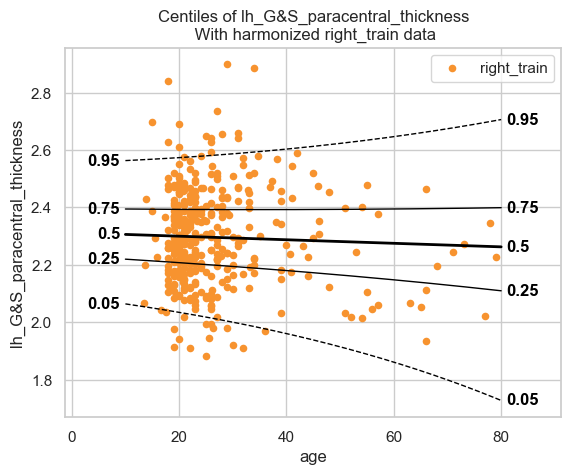

In [ ]:
plot_centiles_advanced(right_model, scatter_data = right_train, covariate_range=(10, 80), show_other_data=True)

In [21]:
# Load the model from disk (could also use the model that we just fitted, but this just shows that you can easily load and transfer a model)
fitted_left_model = NormativeModel.load(left_model.save_dir)
fitted_right_model = NormativeModel.load(right_model.save_dir)

In [28]:
# Merging is super duper easy

# Merge the right model into the left model, will create a new HBR model. 
right_merged_into_left = NormativeModel.merge("../out/models/merge_right_into_left_model",[left_model, right_model])

# If we would change the order of the models in the list, we would get a BLR model.

Sampling: []


Process: 86410 - 2025-11-20 11:10:45 - Dataset "synthesized" created.
    - 614 observations
    - 614 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (11)
    
Process: 86410 - 2025-11-20 11:10:45 - Synthesizing data for 3 response variables.
Process: 86410 - 2025-11-20 11:10:45 - Synthesizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 11:10:46 - Synthesizing data for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 86410 - 2025-11-20 11:10:46 - Synthesizing data for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 11:10:46 - Dataset "synthesized" created.
    - 464 observations
    - 464 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (12)
    
Process: 86410 - 2025-11-20 11:10:46 - Synthesizing data for 3 response variables.
Process: 86410 - 2025-11-20 11:10:46 - Synthesizing data for lh_G&S_frontomargin_thickness.
Process: 86410 - 2025-11-20 11:10:46 - Synthesizing data for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 11:10:46 - Synthesizing data for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 11:10:46 - Dataset "synthesized_+_synthesized" created.
    - 1078 observations
    - 1078 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (2)
	site (23)
    
Process: 86410 - 2025-11-20 11:10:46 - Fitting models on 3 response variables.
Process: 86410 - 2025

Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,45,0.17,24
,2000,40,0.18,31
,2000,29,0.16,31
,2000,14,0.15,31


Process: 86410 - 2025-11-20 11:11:00 - Fitting model for lh_G&S_occipital_inf_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,21,0.17,31
,2000,25,0.17,31
,2000,14,0.17,63
,2000,55,0.16,31


Process: 86410 - 2025-11-20 11:11:13 - Fitting model for lh_G&S_paracentral_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,42,0.14,31
,2000,10,0.15,31
,2000,50,0.15,95
,2000,35,0.15,63


Sampling: []


Process: 86410 - 2025-11-20 11:11:27 - Making predictions on 3 response variables.
Process: 86410 - 2025-11-20 11:11:27 - Computing z-scores for 3 response variables.
Process: 86410 - 2025-11-20 11:11:27 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 86410 - 2025-11-20 11:11:28 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 86410 - 2025-11-20 11:11:28 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 11:11:28 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 11:11:28 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:30 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:32 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:34 - Computing log-probabilities for 3 response variables.
Process: 86410 - 2025-11-20 11:11:34 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 86410 - 2025-11-20 11:11:35 - Computing log-probabilities for lh_G&S_paracentral_thickness.
Process: 86410 - 2025-11-20 11:11:35 - Computing log-probabilities for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 11:11:36 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 86410 - 2025-11-20 11:11:38 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 11:11:38 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 11:11:38 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:39 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:40 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:43 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 11:11:43 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:43 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:11:44 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 86410 - 2025-11-20 11:11:46 - Saving model to:
	../out/models/merge_right_into_left_model.


Sampling: []


Process: 86410 - 2025-11-20 11:13:20 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 86410 - 2025-11-20 11:13:20 - Computing centiles for 3 response variables.
Process: 86410 - 2025-11-20 11:13:20 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:21 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:23 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:24 - Harmonizing data on 3 response variables.
Process: 86410 - 2025-11-20 11:13:24 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:25 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []


Process: 86410 - 2025-11-20 11:13:26 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []


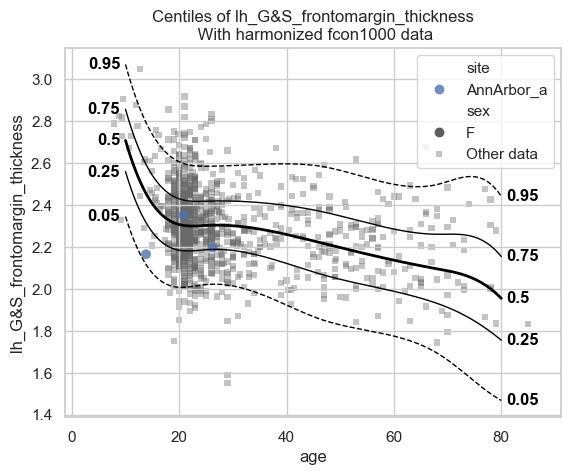

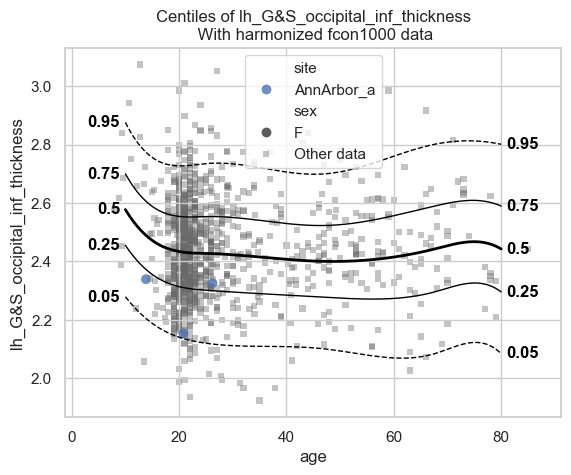

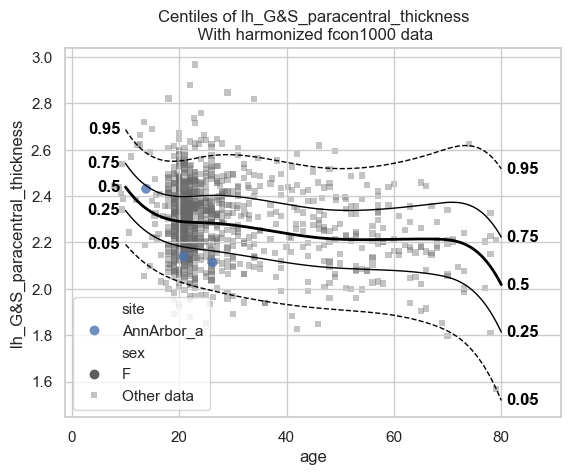

In [30]:
plot_centiles_advanced(right_merged_into_left, scatter_data = data, covariate_range=(10, 80), show_other_data=True)

The above plot show that the merged model is capable of making predictions on the entire source dataset, the one which we split into two to fit our models. The HBR model has learned the group effects of all the sites. 